In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()


In [3]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

模型搭建

In [5]:
# 输入层inputx
inputs = Input(shape=(28*28), name='input')
# 隐层dense  
#•第一层隐层设置：神经元个数256，初始化方法为glorot_normal，激活函数为tanh
x = Dense(units=256,activation='tanh',kernel_initializer='glorot_normal', name='dense_0')(inputs)
#•第二层隐层设置：神经元个数128，初始化方法为glorot_normal，激活函数为tanh
x = Dense(units=128, activation='tanh',kernel_initializer='glorot_normal',name='dense_1')(x)
# 输出层
outputs = Dense(units=10, activation='softmax', name='logit')(x)
# 设置模型的inputs和outputsin
model = Model(inputs=inputs, outputs=outputs)
# 设置损失函数loss、优化器optimizer、评价标准metrics
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd", metrics=['accuracy'])

In [6]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
dense_0 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
logit (Dense)                (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [7]:
#提前终止
earlystopping = EarlyStopping(monitor="val_loss",patience=10,min_delta=1e-4,restore_best_weights=True)

模型训练

In [8]:
history = model.fit(x=x_train, y=y_train, batch_size=32,
                    epochs=150, validation_split=0.2,
                    shuffle=True,callbacks = [earlystopping])

Epoch 1/150
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6853 - accuracy: 0.7757 - val_loss: 0.5156 - val_accuracy: 0.8177
Epoch 2/150
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4791 - accuracy: 0.8316 - val_loss: 0.4552 - val_accuracy: 0.8350
Epoch 3/150
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4390 - accuracy: 0.8441 - val_loss: 0.4327 - val_accuracy: 0.8478
Epoch 4/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4157 - accuracy: 0.8517 - val_loss: 0.4148 - val_accuracy: 0.8493
Epoch 5/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4000 - accuracy: 0.8583 - val_loss: 0.4216 - val_accuracy: 0.8487
Epoch 6/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3871 - accuracy: 0.8629 - val_loss: 0.3953 - val_accuracy: 0.8552
Epoch 7/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3766 - accuracy: 0.8646 - val_loss: 0.3889 - val_ac

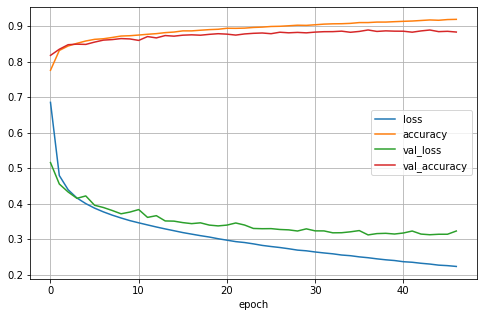

In [9]:
#画图查看history数据的变化趋势
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('epoch')
plt.show()

测试集评估结果

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
print('loss: ', loss)
print('accuracy: ', accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.3411 - accuracy: 0.8798
loss:  0.3410821259021759
accuracy:  0.879800021648407
